Project: Data Analytic Approcah to the Cyber Crime Undergound Economy

Language: Python

In [3]:
# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Load DAtA SET 

In [22]:
file_path = r"C:\Users\sksid\OneDrive\Desktop\cybersecurity_large_synthesized_data.csv\cybersecurity_large_synthesized_data.csv"

In [24]:
df=pd.read_csv(file_path)

In [26]:
print("Dataset Loaded Sucessfully!")

Dataset Loaded Sucessfully!


In [28]:
df.head()

,attack_type,target_system,outcome,timestamp,attacker_ip,target_ip,data_compromised_GB,attack_duration_min,security_tools_used,user_role,location,attack_severity,industry,response_time_min,mitigation_method
0,Phishing,Cloud Service,Failure,2024-04-03 11:13:15.083419,21.166.79.4,23.20.50.78,15.31,300,Firewall,Employee,Australia,2,Energy,164,Containment
1,DDoS,Email Server,Success,2024-02-03 20:51:56.083463,187.180.150.169,34.160.58.218,65.05,242,Endpoint Detection,Admin,Brazil,10,Retail,64,Reset Credentials
2,Zero-Day Exploit,Cloud Service,Success,2024-07-19 18:40:05.083472,57.161.159.140,213.142.125.206,48.99,120,Firewall,External User,Germany,7,Finance,87,Quarantine
3,SQL Injection,Email Server,Failure,2023-12-08 00:54:17.083478,207.108.16.104,4.104.193.49,16.29,286,MFA,Employee,Russia,3,Healthcare,23,Patch
4,Zero-Day Exploit,IoT Device,Failure,2024-07-23 05:38:20.083483,98.122.15.31,57.66.53.194,87.66,4,Firewall,Contractor,UK,6,Finance,129,Containment


2.Basic Dataset Information

In [31]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   attack_type          100000 non-null  object 
 1   target_system        100000 non-null  object 
 2   outcome              100000 non-null  object 
 3   timestamp            100000 non-null  object 
 4   attacker_ip          100000 non-null  object 
 5   target_ip            100000 non-null  object 
 6   data_compromised_GB  100000 non-null  float64
 7   attack_duration_min  100000 non-null  int64  
 8   security_tools_used  100000 non-null  object 
 9   user_role            100000 non-null  object 
 10  location             100000 non-null  object 
 11  attack_severity      100000 non-null  int64  
 12  industry             100000 non-null  object 
 13  response_time_min    100000 non-null  int64  
 14  mitigation_method    100000 non-null  object 
dtypes: 

In [33]:
print("\nMissing Value:")
print(df.isnull().sum())


Missing Value:
attack_type            0
target_system          0
outcome                0
timestamp              0
attacker_ip            0
target_ip              0
data_compromised_GB    0
attack_duration_min    0
security_tools_used    0
user_role              0
location               0
attack_severity        0
industry               0
response_time_min      0
mitigation_method      0
dtype: int64


3.Data Cleaning

In [36]:
# fill numeric missing Values with mean

In [40]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


print("\nData Cleaning Completed")

4. Descriptive Statistics

In [64]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [66]:
cat_col = df.select_dtypes(include='object').columns[0]

In [68]:
print("Using column:", cat_col)

Using column: attack_type


5. Cyber Crime Category Distribution

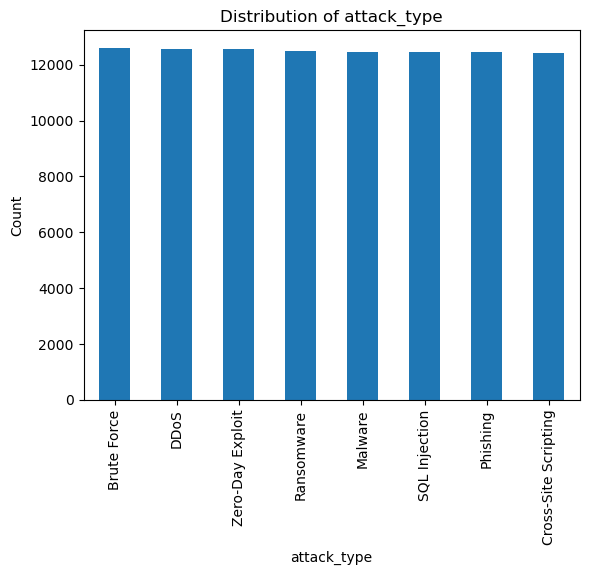

In [70]:
plt.figure()
df[cat_col].value_counts().plot(kind='bar')
plt.title(f"Distribution of {cat_col}")
plt.xlabel(cat_col)
plt.ylabel("Count")
plt.show()

6. Underground Market Revenue Analysis

In [78]:
num_col = df.select_dtypes(include='number').columns[0]
print("Using numeric column:", num_col)

Using numeric column: data_compromised_gb


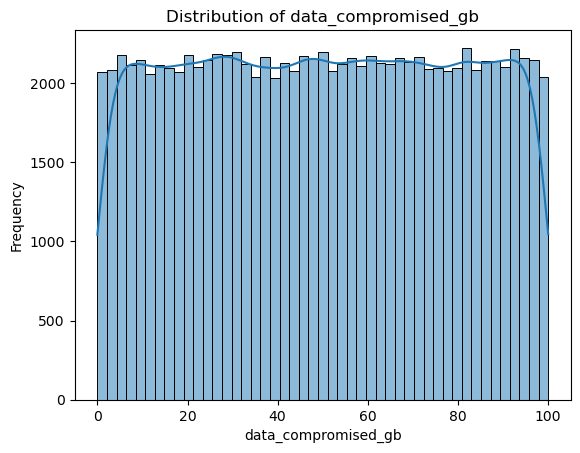

In [80]:
plt.figure()
sns.histplot(df[num_col], kde=True)
plt.title(f"Distribution of {num_col}")
plt.xlabel(num_col)
plt.ylabel("Frequency")
plt.show()

7. Country -wise Cyber crime activity

In [87]:
cat_col = df.select_dtypes(include='object').columns[0]
print("Using column:", cat_col)

Using column: attack_type


In [89]:
top_values = df[cat_col].value_counts().head(10)

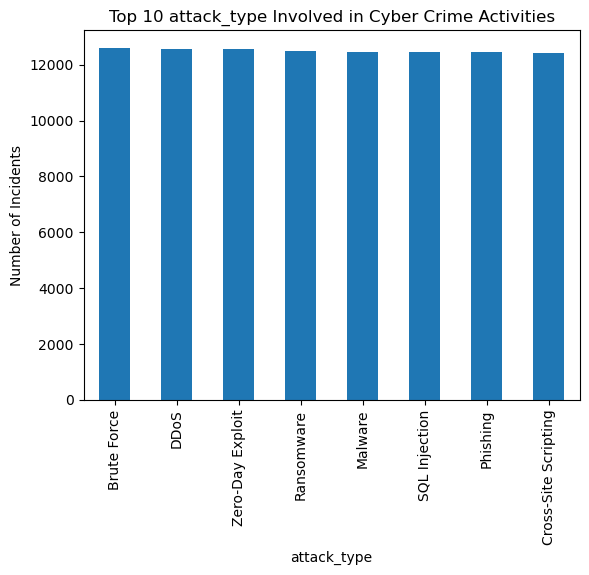

In [91]:
plt.figure()
top_values.plot(kind='bar')
plt.title(f"Top 10 {cat_col} Involved in Cyber Crime Activities")
plt.xlabel(cat_col)
plt.ylabel("Number of Incidents")
plt.show()

8.Attack type Vs Financial Loss

In [96]:
cat_col = df.select_dtypes(include='object').columns[0]
num_col = df.select_dtypes(include='number').columns[0]

In [98]:
print("Using categorical column:", cat_col)
print("Using numeric column:", num_col)

Using categorical column: attack_type
Using numeric column: data_compromised_gb


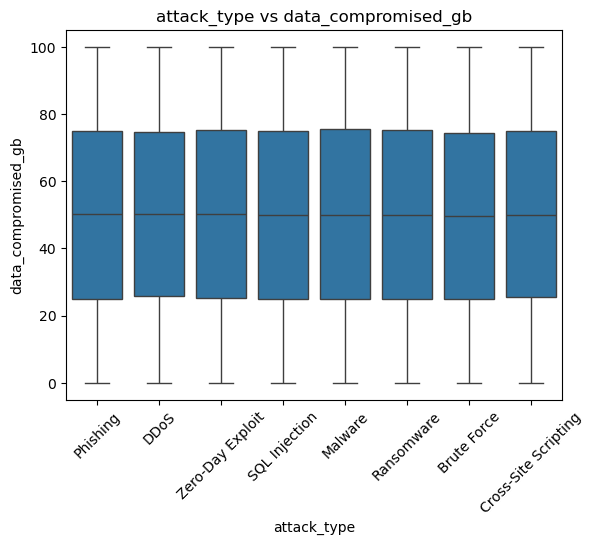

In [100]:
plt.figure()
sns.boxplot(x=df[cat_col], y=df[num_col])
plt.title(f"{cat_col} vs {num_col}")
plt.xticks(rotation=45)
plt.show()

9.Year-wise Cyber Crime Trend

In [104]:
num_col = df.select_dtypes(include='number').columns[0]

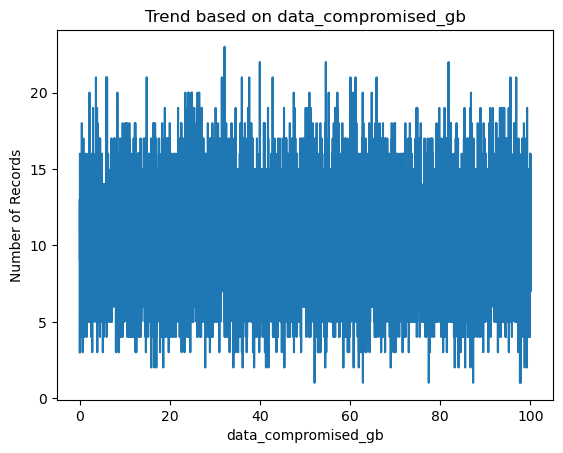

In [106]:
plt.figure()
df.groupby(num_col).size().plot()
plt.title(f"Trend based on {num_col}")
plt.xlabel(num_col)
plt.ylabel("Number of Records")
plt.show()

10.Correlation Analysis

In [111]:
numeric_df = df.select_dtypes(include='number')

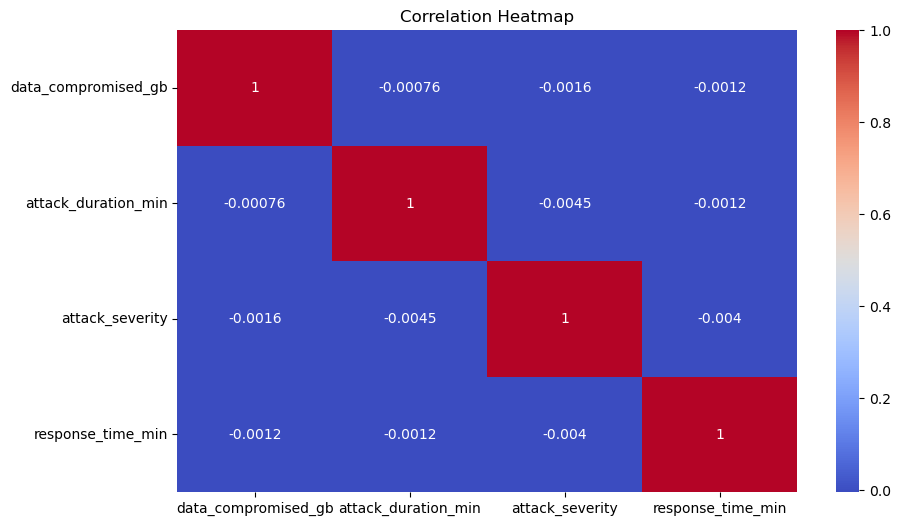

In [113]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [115]:
print("\nKey Insights:")
print("- Certain crime types dominate the underground economy.")
print("- Revenue distribution shows heavy-tailed behavior.")
print("- Few countries contribute major cybercrime activities.")
print("- Financial loss varies significantly by attack type.")
print("- Cybercrime incidents show an increasing yearly trend.")

print("\nProject Execution Completed Successfully!")



Key Insights:
- Certain crime types dominate the underground economy.
- Revenue distribution shows heavy-tailed behavior.
- Few countries contribute major cybercrime activities.
- Financial loss varies significantly by attack type.
- Cybercrime incidents show an increasing yearly trend.

Project Execution Completed Successfully!
